In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape


(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

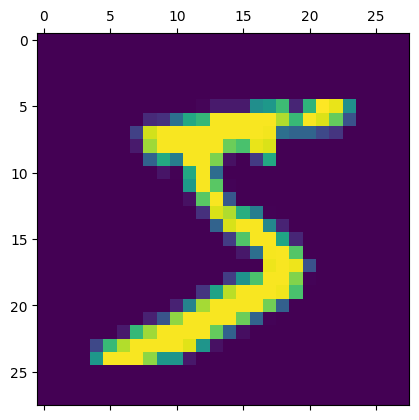

In [7]:
plt.matshow(x_train[0])

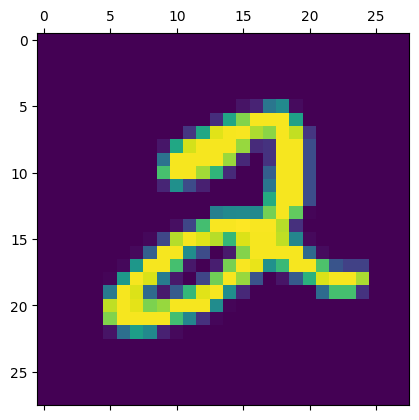

In [8]:
plt.matshow(x_train[5])

In [9]:
y_train[2]

4

In [10]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [11]:
x_train = x_train / 255
x_test = x_test / 255 #since the accuracy was a little bit low so we need to scale the data.The data was between 0-255

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5) #epochs= number of training iterations the NN

C:\Users\AZAN LAPTOP STORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8093 - loss: 0.7248
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9145 - loss: 0.3074
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9214 - loss: 0.2829
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9233 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9274 - loss: 0.2620


Note:If the accuracy is low you need to scale the data.


In [15]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9158 - loss: 0.3042


[0.2675415873527527, 0.9258999824523926]

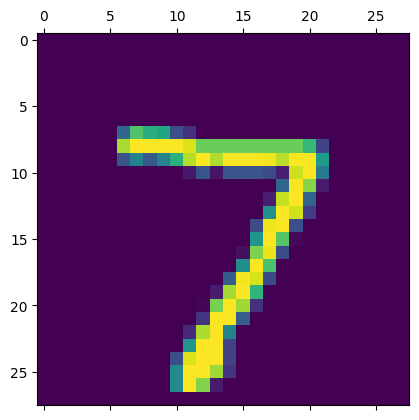

In [16]:
#checking the digits
plt.matshow(x_test[0])

In [17]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.9244063e-02, 4.7622456e-07, 6.2615126e-02, 9.5291072e-01,
       1.9187507e-03, 1.3043357e-01, 1.7736676e-06, 9.9979919e-01,
       1.1100815e-01, 6.6890049e-01], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

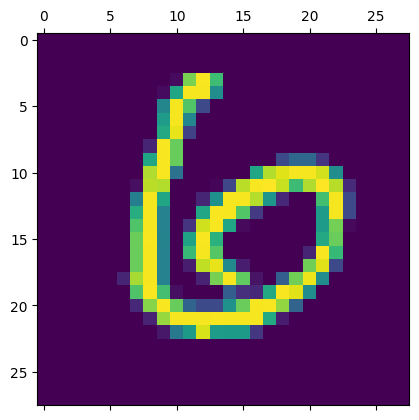

In [19]:
plt.matshow(x_test[11])

In [20]:
y_predicted=model.predict(x_test_flattened)
y_predicted[11]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.52681535e-02, 8.66674702e-04, 2.07484454e-01, 3.05752661e-02,
       6.37341896e-03, 1.47951685e-03, 7.99833596e-01, 1.76100784e-05,
       2.61182487e-01, 6.40325248e-04], dtype=float32)

In [21]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
np.argmax(y_predicted[11])

6

In [24]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    3,    8,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   7,    9,  922,   17,   10,    4,   13,   11,   35,    4],
       [   3,    0,   17,  930,    0,   21,    2,   12,   17,    8],
       [   1,    1,    2,    1,  914,    0,   13,    5,    9,   36],
       [  12,    3,    3,   33,   10,  770,   19,    5,   29,    8],
       [  13,    3,    6,    1,    7,    8,  917,    2,    1,    0],
       [   1,    5,   22,    7,    7,    0,    0,  950,    2,   34],
       [  11,    8,    6,   24,    8,   25,   11,   13,  858,   10],
       [  12,    7,    1,   11,   26,    6,    0,   21,    5,  920]])>

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(70.72222222222221, 0.5, 'Truth labels')

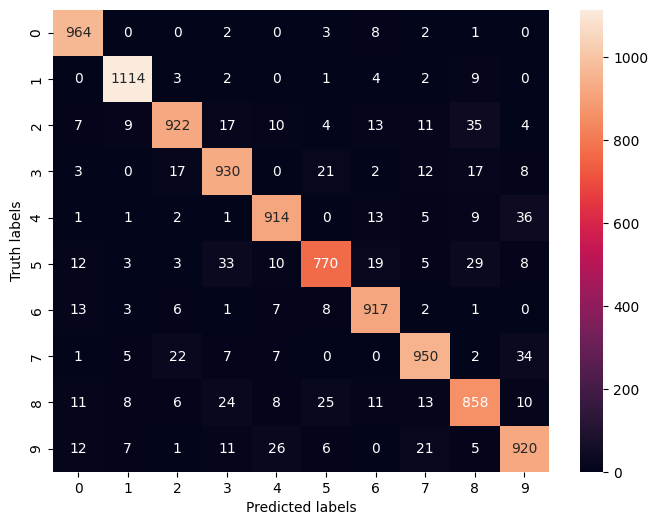

In [25]:
import seaborn as sns
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Truth labels')

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #using keras flatten function so we do not need to use the numpy array to fallten
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') 
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8720 - loss: 0.4601
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9615 - loss: 0.1316
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9729 - loss: 0.0907
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9792 - loss: 0.0677
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0525
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9878 - loss: 0.0405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0331
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0272
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9944 - loss: 0.0203
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9945 - loss: 0.0191


In [31]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9747 - loss: 0.0942


[0.08112381398677826, 0.9765999913215637]

Including the hidden layer, it improved the accuracy.
